In [58]:
# imports
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import scipy
import seaborn as sns

In [59]:
# read file and set columns identifiers
path_file = 'bellcore_data.csv'
df = pd.read_csv(path_file,header=None)
df.columns = ['Tempo Trace', 'Numero de Pacotes']
df.describe()

,Tempo Trace,Numero de Pacotes
count,13107.000000,13107.000000
mean,21.046862,657.022889
std,11.043100,586.662403
min,0.017716,64.000000
25%,11.290324,133.000000
50%,23.519164,174.000000
75%,30.037934,1090.000000
max,38.706900,1518.000000


In [60]:
dn_num_pkg_mean = df['Numero de Pacotes'].mean(axis=0)
dn_num_pkg_std = df['Numero de Pacotes'].std(axis=0)
df_mediam = df['Numero de Pacotes'].median(axis=0)

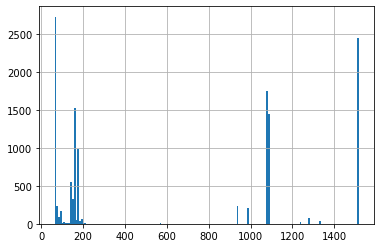

In [62]:
# Plot histogram
hist = df['Numero de Pacotes'].hist(bins = int(df_mediam))

In [57]:
# Creating a series of data of in range of 1-50.
x = np.linspace(1,50,200)
print(x.size)

200


In [50]:
#Creating a Function.
def normal_dist(x , dn_num_pkg_mean , dn_num_pkg_std):
    prob_density = (np.pi*dn_num_pkg_std) * np.exp(-0.5*((x-dn_num_pkg_mean)/dn_num_pkg_std)**2)
    return prob_density

In [51]:
#Calculate mean and Standard deviation.
mean = np.mean(x)
sd = np.std(x)

In [52]:
#Apply function to the data.
pdf = normal_dist(x,mean,sd)

Text(0, 0.5, 'Probability Density')

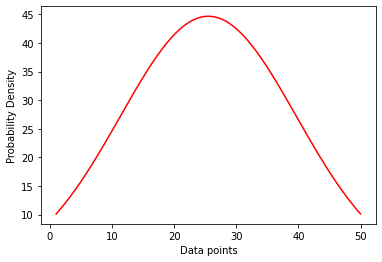

In [53]:
#Plotting the Results
plt.plot(x,pdf , color = 'red')
plt.xlabel('Data points')
plt.ylabel('Probability Density')

In [14]:
## histograma, fn dist cumulative pkg

x = df_padrao[1] # tamanho do pacote
norm_cdf = scipy.stats.norm.cdf(x) # calculate the cdf - also discrete

# plot the cdf
sns.lineplot(x=x, y=norm_cdf)
plt.show()

#print (df_padrao[1])

# setando os resamples por tempo diferente:

df['coluna_sec'] = pd.to_datetime(df[0], unit='s')
df.set_index('coluna_sec')
df.index = pd.to_datetime(df.index, unit='s')

df.columns = ['Tempo Trace', 'Numero de Pacotes', 'index']

df_100ms = df.resample('100ms').sum()
df_1seg = df.resample('1S').sum()
df_10seg = df.resample('10S').sum()

#média
#print (df_padrao)
#print(df_padrao.mean())
#print(df_100ms)

#print(df_100ms['Numero de Pacotes'].mean())
#print(df_1seg['Numero de Pacotes'].mean())
#print(df_10seg['Numero de Pacotes'].mean())

KeyError: 1